# Geoinformática - Práctica 9
## Difusión Espacial - Modelo de Hägerstrand
## Parte 1 - Introducción al Modelo

En primer lugar, es necesario importar las librerías a utilizar durante la práctica.

In [1]:
%pylab inline

from haggerstrand.diffusion import SimpleDiffusion

Populating the interactive namespace from numpy and matplotlib


La primera línea sigue la misma estructura que el comando `%matplotlib inline` utilizado en prácticas anteriores; en este caso, se importa la librería `pylab` y, a través de la instrucción `inline` se asegura que todas las gráficas aparezcan dentro del espacio de trabajo.

La siguiente línea requiere un poco más de atención. Ésta sigue exactamente la misma estructura que cualquier otra importación de librerías, siendo en este caso que se llama una bajo el nombre de `haggerstrand`; sin embargo, si se intenta instalar ésta a través del asistente *Conda*, o si quiera buscarla en internet, se encontrará que no se encuentra disponible o no puede ser encontrada.

Esto es porque, a diferencia de otras prácticas, se está trabajando con una librería *local*; si se revisa el directorio de trabajo, se encontrará que existe una carpeta con el nombre de ésta, `haggerstrand`, la cual contiene múltiples archivos de *Python* que almacenan todas las funciones y clases asociadas a la librería. Como tal, es importante destacar que, en *Python*, no sólo se pueden trabajar con librerías estandarizadas y vastamente distribuidas, como `numpy` o `pandas`, sino también con librerías locales creadas por el usuario o equipos de trabajo, como `haggerstrand`.

En la celda anterior, de la librería `haggerstrand` se importó la *Clase* llamada `SimpleDiffusion`, que es en la cual se está implementando el algoritmo. Para ejecutar el modelo, primero es necesario *instanciar* a la clase, es decir, expresarla en el código:

In [2]:
s = SimpleDiffusion(N=50 , M=50 , mif_size=9 , pob=20 , initial_diff=[(20,20)] , p0=0.3 , max_iter=15)

Los parámetros que componen a la clase `SimpleDiffusion` son los siguientes:
* `N` - Número de Renglones en el Espacio de la Simulación
* `M` - Número de Columnas en el Espacio de la Simulación
* `mif_size` - Tamaño de la Matriz Cuadrada, que debe ser un número impar
* `pob` - Número de Habitantes en cada Celda
* `initial_diff` - Coordenadas en donde se encuentran los Difusores Iniciales
* `p0` - Probabilidad de contactar a la Celda Origen
* `max_iter` - Número de Iteraciones a simular

Esta información, junto con otra relacionada a la Clase, pueden consultarse a través de `help()`:

In [3]:
help(SimpleDiffusion)

Help on class SimpleDiffusion in module haggerstrand.diffusion:

class SimpleDiffusion(Diffusion)
 |  SimpleDiffusion(N=100, M=100, mif_size=5, pob=20, initial_diff=[(50, 50)], p0=0.3, max_iter=15)
 |  
 |  Modelo simple de difusión espacial basado en Hägerstrand.
 |  
 |  1.- Espacio homogeneo e isotrópico
 |  2.- Un sólo difusor inicial
 |  3.- ....otras suposiciones...
 |  
 |  :param N: int Número de renglones en el espacio de simulación
 |  :param M: int Número de columnas en el espacio de simulación
 |  :param mif_size: int Tamaño de la matriz (cuadrada) del MIF (debe ser non)
 |  :param pob: int población en cada celda
 |  :param initial_diff: [(int,int)] Lista de coordenadas de los difusores
 |                                   iniciales
 |  :param p0: float Probabilidad de auto-difusión
 |  :param max_iter: int Máximo número de iteraciones
 |  
 |  :attribute space: np.array(M,N,dtype=np.int8) El espacio disponible
 |  :attribute _pop_array: np.array(M*N,pob,dtype=np.bool) arr

Una vez *instanciada* la clase, es posible ejecutar la simulación, utilizando la función `.spatial_diffusion()` sobre la variable que contiene a la clase:

In [4]:
s.spatial_diffusion()

acabé
Hay 8960 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


El algoritmo almacena los resultados de cada una de las iteraciones realizadas en una Matriz Tridimensional de `M`x`N`x`max_iter`, teniéndose el resultado final en la última sección, o *rebanada*, de esta matriz, la cual puede ser llamada a través del atributo `result`:

In [5]:
s.result[: , : , s.max_iter - 1]

array([[16, 11,  8, ...,  0,  0,  0],
       [ 9,  9, 13, ...,  0,  0,  0],
       [11, 17, 12, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int8)

Resulta interesante revisar a detalle la notación utilizada; Dado que `s.result` es una lista, o un *array*, es posible utilizar las técnicas ya estudiadas para recuperar los elementos en su interior. Debido a que es una Matriz Tridimensional, se necesitan de tres índices para explorar su interior; los primeros dos son populados por el caracter `:`, el cual indica que se llaman a todas filas y columnas de la lista, mientras que `s.max_iter - 1` es la sección que índica que sólo se necesita la última rebanada de la matriz. Por otra parte, el `-1` es utilizado debido a que, en *Python*, las numeraciones comienzan desde el cero.

Utilizando la notación `s.result`, se ha llamado al atributo llamado `result` de la clase `SpatialDiffusion` que se encuentra contenida en la variable `s`; éste no es el único atributo asociado a esta clase y, a través del comando `help(SimpleDiffusion)` presentado en celdas anteriores, es posible ver todos los atributos que es posible llamar.

Claro está que observar los números de la matriz resultante del algoritmo no es la mejor manera de visualizar y analizar el proceso, por lo que es útil realizar una gráfica para entender de mejor manera lo realizado:

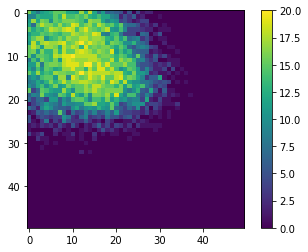

In [6]:
img_s = plt.imshow(s.result[: , : , s.max_iter - 1] , vmin = 0 , vmax = 20)  # Generación de la Gráfica
plt.colorbar(img_s)                                                          # Referencia de Valores
plt.show()                                                                   # Mostrar el resultado

Los pasos realizados en la celda anterior son:
1. Primero, se genera la gráfica a través de la función `.imshow()` de la librería `matplotlib`; debido a que lo que se coloca dentro de la función es una matriz, ésta puede ser interpretada directamente como una imagen, razón por la cual no es necesario colocar más argumentos. La gráfica es guardada en la variable `img_s`; además, los argumentos `vmin` y `vmax` son utilizados para definir los límites de la escala de colores utilizada en la gráfica, y corresponden al número mínimo y máximo de habitantes que pueden recibir el *Mensaje* en cada celda.
2. A través de la función `.colorbar()`, se genera una Barra de Colores de la gráfica creada, la cual sirve como referencia para entender los valores observados.
3. Como se ha hecho anteriormente, el resultado es mostrado a través de la función `.show()`

El resultado observado es el espacio en el cual se realizó el proceso de Difusión Espacial. Dentro de las propiedades asignadas a la clase `SimpleDiffusion`, se determinó que el espacio del experimento sería de 50x50 (a través de `N` y `M`), verificable con los ejes de la gráfica, y que la población en cada una de las celdas sería de 20 habitantes (`pob`). Lo que se observa es que, después de 15 iteraciones (`max_iter`), el *Mensaje* contenido inicialmente en la celda (20,20) (`initial_diff`) se *difundió* en el espacio al resto de las celdas marcadas, teniéndose que no todos los 20 habitantes existentes en cada una de las celdas recibieron el *Mensaje*, sino únicamente la cantidad determinada por su color.

#### Ejercicio
A través de la instrucción `s.result` es posible visualizar diferentes cortes temporales del proceso, es decir, el comportamiento de la Difusión Espacial a través de las diferentes iteraciones. Por ejemplo, si se desease observar lo ocurrido después de la séptima iteración, se podría:

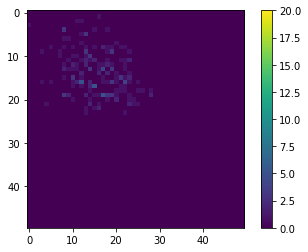

In [7]:
img_s = plt.imshow(s.result[: , : , 7] , vmin = 0 , vmax = 20)
plt.colorbar(img_s)
plt.show()

Visualiza lo ocurrido a diferentes cortes temporales.
___
### Difusión Aleatoria
Para entender más a detalle el proceso de Difusión Espacial, conviene comparar los resultados de éste con lo que sucedería en un proceso completamente aleatorio. Para esto, en lugar de utilizar el método `.spatial_diffusion()`, se recurrirá al llamado `.random_diffusion()`:

In [8]:
# Se instancia nuevamente la clase, utilizando exactamente los mismos argumentos, en una variable diferente
r = SimpleDiffusion(N=50 , M=50 , mif_size=9 , pob=20 , initial_diff=[(20,20)] , p0=0.3 , max_iter=15)

# Se aplica la función '.random_diffusion()' sobre esta nueva variable
r.random_diffusion()

acabé
Hay 21419 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 15


Utilizando exactamente los mismos comandos que en el caso anterior, es posible observar el resultado final del nuevo proceso:

In [9]:
r.result[: , : , r.max_iter - 1]

array([[14,  9,  6, ...,  2, 11,  7],
       [ 7,  7, 10, ...,  7, 10, 10],
       [ 3,  8,  7, ...,  6,  4,  8],
       ...,
       [ 8, 13, 11, ...,  8, 10,  6],
       [13, 10, 12, ..., 11,  4,  9],
       [ 9, 12,  8, ...,  9,  8,  8]], dtype=int8)

Y, de igual forma, graficar para tener una mejor visualización y poder realizar el análisis deseado:

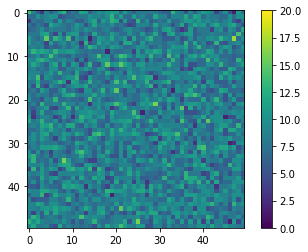

In [10]:
img_r = plt.imshow(r.result[: , : , r.max_iter - 1] , vmin = 0 , vmax = 20)  # Generación de la Gráfica
plt.colorbar(img_r)                                                          # Referencia de Valores
plt.show()                                                                   # Mostrar el resultado

Con lo anterior, es posible comparar los resultados obtenidos a través del Modelo de Difusión Espacial (`.spatial_diffusion()`) y la Difusión Aleatoria (`.random_diffusion()`):

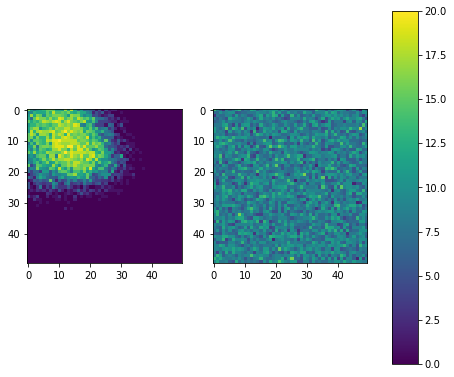

In [11]:
# Crear la figura donde aparecerán las gráficas
fig , filas = plt.subplots(nrows = 1 , ncols = 2, figsize = (7,7))

# Graficar lo obtenido a través de '.spatial_diffusion()'
img_s = filas[0].imshow(s.result[: , : , s.max_iter - 1] , vmin = 0 , vmax = 20)

# Graficar lo obtenido a través de '.random_diffusion()'
img_r = filas[1].imshow(r.result[: , : , r.max_iter - 1] , vmin = 0 , vmax = 20)

# Graficar la Barra de Colores para referencia, y colocarla de forma estética
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(img_r, cax=cbar_ax)

plt.show()

En la celda anterior, se crea una figura para graficar, como se ha hecho tradicionalmente en prácticas anteriores, esta vez utilizando los argumentos `nrows` y `ncols` para especificar el número de filas y columnas que tendrá la imagen resultante; asimismo, al momento de generar las gráficas, debe notarse cómo `plt.imshow()` ha sido sustituido por `filas[].imshow()`, indicando dentro de los corchetes el número de la columna dentro de la cual aparecerá la gráfica. Por otra parte, las indicaciones que acompañan a la función `.colorbar()` son puramente estéticas, para asegurar que la Barra de Colores aparezca sin alterar la apariencia de las gráficas.

#### Ejercicio
También es posible realizar diferentes cortes temporales del proceso ejecutado a través de la Difusión Aleatoria; por ejemplo, si se quisiera observar el estado del espacio después de la séptima iteración:

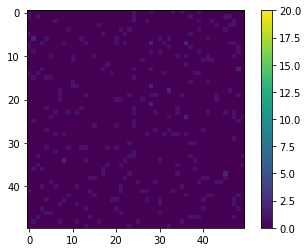

In [12]:
img_r = plt.imshow(r.result[: , : , 7] , vmin = 0 , vmax = 20)
plt.colorbar(img_r)
plt.show()

Y, como tal, también es posible comparan los resultados de la Difusión Espacial y la Aleatoria a través de sus diferentes estados en el tiempo:

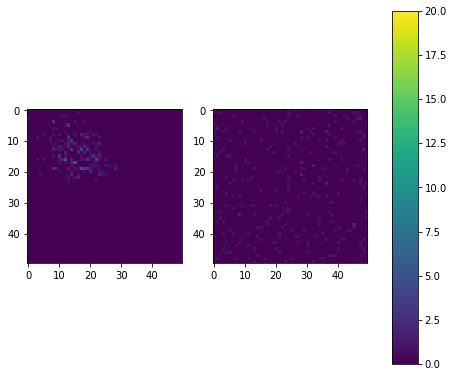

In [13]:
fig , filas = plt.subplots(nrows = 1 , ncols = 2, figsize = (7,7))

img_s = filas[0].imshow(s.result[: , : , 7] , vmin = 0 , vmax = 20)

img_r = filas[1].imshow(r.result[: , : , 7] , vmin = 0 , vmax = 20)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(img_r, cax=cbar_ax)

plt.show()

Utilizando los comandos anteriores, compara los estados de los dos algoritmos a diferentes estados del tiempo, y responde la pregunta: ¿Qué diferencias puedes observar?
___
### Evolución Temporal
Puede observarse que los resultados de la Difusión Espacial y la Difusión Aleatoria son muy diferentes, tanto en el resultado final obtenido como en la evolución temporal de los mismos; un análisis más detallado implica estudiar este último aspecto más a fondo. Para esto, la clase `SimpleDiffusion` posee un atributo llamado `time_series`, que arroja una lista del número de habitantes que reciben el *Mensaje* después de cada iteración; en otras palabras, se muestra el número de adoptantes en cada iteración; observando lo ocurrido en la Difusión Espacial:

In [14]:
s.time_series

[1, 2, 3, 6, 12, 24, 49, 96, 184, 346, 627, 1107, 1710, 2282, 2510]

Es posible graficar la lista anterior rápidamente a través de la función `.plot()`

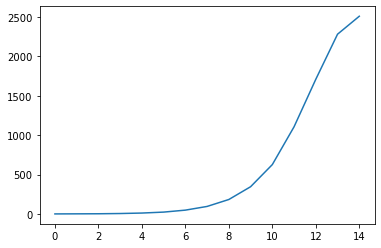

In [15]:
plt.plot(s.time_series)
plt.show()

Puede observarse que el crecimiento parece ser de Tipo Exponencial. Vale la pena preguntarse, ¿qué ocurre si se aumenta el número de iteraciones del proceso? Esto se realiza rápidamente modificando la propiedad `max_iter` de la clase `SimpleDiffusion`, para después repetir el proceso nuevamente:

acabé
Hay 20851 adoptantes de un total de 50000 habitantes
El total de iteraciones realizadas es 20


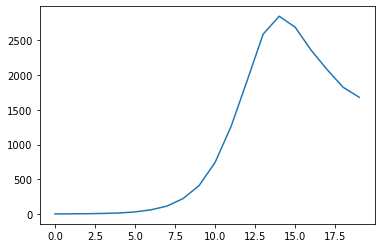

In [16]:
# Instanciar la clase, modificando 'max_iter'
s = SimpleDiffusion(N=50 , M=50 , mif_size=9 , pob=20 , initial_diff=[(20,20)] , p0=0.3 , max_iter=20)

# Ejecutar el algoritmo
s.spatial_diffusion()

# Graficar el atributo 'time_series'
plt.plot(s.time_series)
plt.show()

Aunque en un principio se observa el mismo comportamiento observado anteriormente, después de la decimoquinta iteración el número de adoptantes comienza a decrecer. Esto no significa que el número total de personas que han adoptado el *Mensaje* empieza a disminuir; más bien, que, conforme avanza el tiempo, cada vez menos personas comienzan a adoptar el *Mensaje*.

#### Ejercicio
Responde a las preguntas: ¿Por qué en un principio se observa un comportamiento aparentemente exponencial? ¿Por qué, después de un cierto número de iteraciones, el número de adoptantes disminuye? ¿Ocurrirá lo mismo en el caso de la Difusión Aleatoria? Complementa esta última pregunta ejecutando el código que te permita responderla.